In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [105]:
df= pd.read_csv(r"D:\python\PROJECT_1\DATA_PV\zapis_testowy.csv")
#df

In [106]:
df.dtypes

Unnamed: 0              int64
nazwisko               object
imie                   object
adres                  object
moc                   float64
kwota_brutto          float64
mail                   object
telefon                object
miesiac_podp_umowy     object
rok_podp_umowy          int64
dtype: object

In [107]:
df.kwota_brutto= df.kwota_brutto.astype(float)
#df

In [108]:
#df[df.rok_podp_umowy==2022]

In [109]:
df2 = pd.read_csv(r"D:\python\PROJECT_1\DATA_PV\zapis_testowy_2.csv", usecols=['moc', 'kwota_brutto', 'miesiac_podp_umowy','rok_podp_umowy'])
df2['sr_cena_kW_brutto'] = (df2.kwota_brutto/df2.moc).round(2)
df2


,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
0,5.12,26300.0,luty,2020,5136.72
1,4.32,21000.0,luty,2020,4861.11
2,4.16,21000.0,marzec,2020,5048.08
3,3.52,19500.0,marzec,2020,5539.77
4,3.84,18000.0,marzec,2020,4687.50
...,...,...,...,...,...
464,2.07,12243.0,marzec,2022,5914.49
465,9.25,48000.0,marzec,2022,5189.19
466,4.50,26830.0,marzec,2022,5962.22
467,9.88,51300.0,marzec,2022,5192.31


In [110]:
df2.miesiac_podp_umowy.replace('styczeń','01', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('luty','02', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('marzec','03', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('kwiecień','04', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('maj','05', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('czerwiec','06', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('lipiec','07', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('sierpień','08', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('wrzesień','09', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('październik','10', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('listopad','11', regex= True, inplace=True)
df2.miesiac_podp_umowy.replace('grudzień','12', regex= True, inplace=True)

In [111]:
df_year= df2.groupby("rok_podp_umowy")
df_year

In [112]:
df_year.size()

rok_podp_umowy
2020    232
2021    224
2022     13
dtype: int64

In [113]:
df_year.sum()

,moc,kwota_brutto,sr_cena_kW_brutto
rok_podp_umowy,,,
2020,1562.07,7075747.84,1095751.53
2021,1809.67,8092147.34,NaN
2022,64.89,363193.00,75989.90


In [114]:
df_year.mean().round(2)

,moc,kwota_brutto,sr_cena_kW_brutto
rok_podp_umowy,,,
2020,6.73,30498.91,4723.07
2021,8.08,36125.66,NaN
2022,4.99,27937.92,5845.38


In [115]:
df_year.median()

,moc,kwota_brutto,sr_cena_kW_brutto
rok_podp_umowy,,,
2020,5.180,24882.0,4748.945
2021,5.215,28300.0,4799.615
2022,4.180,24000.0,5914.490


In [116]:
df_year.max()

,moc,kwota_brutto,miesiac_podp_umowy,sr_cena_kW_brutto
rok_podp_umowy,,,,
2020,49.950,184500.0,12,6925.68
2021,49.875,174660.0,12,inf
2022,9.880,51300.0,03,6991.34


In [117]:
pd.pivot_table(df2, index=["rok_podp_umowy","miesiac_podp_umowy"] , values=["moc", "kwota_brutto"], aggfunc="sum").round(2)

kwota_brutto     moc
rok_podp_umowy miesiac_podp_umowy                      
2020           02                      47300.00    9.44
               03                     267100.00   55.28
               04                     366900.00   76.00
               05                     579713.00  120.80
               06                     450300.00   97.18
               07                     600002.40  129.74
               08                     660447.76  145.43
               09                    1158608.00  263.50
               10                    1378425.00  314.91
               11                     861985.80  188.94
               12                     704965.88  160.84
2021           01                     482991.00  129.86
               02                     814467.50  204.53
               03                     432085.00  112.52
               04                     881138.97  213.72
               05                     308696.00   70.89
               06                     779614.90  180.36
               07                     697297.80  167.72
               08                     752620.00  150.50
               09                    1077645.10  222.36
               10                    1191331.07  232.96
               11                     359260.00   75.14
               12                     315000.00   49.10
2022           01                     124020.00   20.27
               02                      15900.00    2.28
               03                     223273.00   42.34

In [118]:
df_pivot1=pd.pivot_table(df2, index="miesiac_podp_umowy", values=["moc", "kwota_brutto"],
               columns="rok_podp_umowy", aggfunc=["sum", "min", "max"], fill_value=0)
df_pivot1

sum                                               \
                   kwota_brutto                          moc                   
rok_podp_umowy             2020        2021    2022     2020     2021   2022   
miesiac_podp_umowy                                                             
01                         0.00   482991.00  124020    0.000  129.865  20.27   
02                     47300.00   814467.50   15900    9.440  204.530   2.28   
03                    267100.00   432085.00  223273   55.280  112.520  42.34   
04                    366900.00   881138.97       0   76.000  213.725   0.00   
05                    579713.00   308696.00       0  120.800   70.890   0.00   
06                    450300.00   779614.90       0   97.185  180.360   0.00   
07                    600002.40   697297.80       0  129.735  167.720   0.00   
08                    660447.76   752620.00       0  145.430  150.495   0.00   
09                   1158608.00  1077645.10       0  263.505  222.365   0.00   
10                   1378425.00  1191331.07       0  314.910  232.960   0.00   
11                    861985.80   359260.00       0  188.945   75.135   0.00   
12                    704965.88   315000.00       0  160.840   49.105   0.00   

                            min                                           max  \
                   kwota_brutto                 moc              kwota_brutto   
rok_podp_umowy             2020   2021   2022  2020   2021  2022         2020   
miesiac_podp_umowy                                                              
01                            0  18000  13920  0.00  3.750  2.28            0   
02                        21000   2400  15900  4.32  0.740  2.28        26300   
03                        18000  16100  12243  3.52  3.375  2.07        36700   
04                        17300   7700      0  3.60  2.250  0.00        47000   
05                        17000  17000      0  3.15  3.330  0.00        75645   
06                        18200  15500      0  3.50  0.000  0.00       123000   
07                        14500  15800      0  2.59  3.040  0.00        43000   
08                        15300  14500      0  2.92  1.980  0.00       123000   
09                        12500  13590      0  2.22  1.980  0.00       184500   
10                         5000  10500      0  1.48  2.280  0.00        73800   
11                        13500  25000      0  2.59  4.240  0.00        67650   
12                        15500   6500      0  2.62  1.920  0.00       117096   

                                                          
                                       moc                
rok_podp_umowy          2021   2022   2020    2021  2022  
miesiac_podp_umowy                                        
01                  141450.0  33000   0.00  49.875  5.92  
02                  104550.0  15900   5.12  31.875  2.28  
03                  174660.0  51300   8.00  49.500  9.88  
04                  127920.0      0   9.99  39.930  0.00  
05                   55000.0      0  14.80  15.170  0.00  
06                  116763.9      0  28.00  29.700  0.00  
07                  130000.0      0   9.99  39.990  0.00  
08                   77000.0      0  30.34  20.700  0.00  
09                  118412.1      0  49.95  31.955  0.00  
10                  101000.0      0  18.87  32.300  0.00  
11                   77000.0      0  17.02  20.790  0.00  
12                   34500.0      0  28.00   4.950  0.00

In [119]:
sorted(df_pivot1.columns)

[('max', 'kwota_brutto', 2020),
 ('max', 'kwota_brutto', 2021),
 ('max', 'kwota_brutto', 2022),
 ('max', 'moc', 2020),
 ('max', 'moc', 2021),
 ('max', 'moc', 2022),
 ('min', 'kwota_brutto', 2020),
 ('min', 'kwota_brutto', 2021),
 ('min', 'kwota_brutto', 2022),
 ('min', 'moc', 2020),
 ('min', 'moc', 2021),
 ('min', 'moc', 2022),
 ('sum', 'kwota_brutto', 2020),
 ('sum', 'kwota_brutto', 2021),
 ('sum', 'kwota_brutto', 2022),
 ('sum', 'moc', 2020),
 ('sum', 'moc', 2021),
 ('sum', 'moc', 2022)]

In [120]:
df_pivot1[sorted(df_pivot1.columns, key= lambda x: x[2])]

sum                   min                max  \
                   kwota_brutto      moc kwota_brutto   moc kwota_brutto   
rok_podp_umowy             2020     2020         2020  2020         2020   
miesiac_podp_umowy                                                         
01                         0.00    0.000            0  0.00            0   
02                     47300.00    9.440        21000  4.32        26300   
03                    267100.00   55.280        18000  3.52        36700   
04                    366900.00   76.000        17300  3.60        47000   
05                    579713.00  120.800        17000  3.15        75645   
06                    450300.00   97.185        18200  3.50       123000   
07                    600002.40  129.735        14500  2.59        43000   
08                    660447.76  145.430        15300  2.92       123000   
09                   1158608.00  263.505        12500  2.22       184500   
10                   1378425.00  314.910         5000  1.48        73800   
11                    861985.80  188.945        13500  2.59        67650   
12                    704965.88  160.840        15500  2.62       117096   

                                   sum                   min         \
                      moc kwota_brutto      moc kwota_brutto    moc   
rok_podp_umowy       2020         2021     2021         2021   2021   
miesiac_podp_umowy                                                    
01                   0.00    482991.00  129.865        18000  3.750   
02                   5.12    814467.50  204.530         2400  0.740   
03                   8.00    432085.00  112.520        16100  3.375   
04                   9.99    881138.97  213.725         7700  2.250   
05                  14.80    308696.00   70.890        17000  3.330   
06                  28.00    779614.90  180.360        15500  0.000   
07                   9.99    697297.80  167.720        15800  3.040   
08                  30.34    752620.00  150.495        14500  1.980   
09                  49.95   1077645.10  222.365        13590  1.980   
10                  18.87   1191331.07  232.960        10500  2.280   
11                  17.02    359260.00   75.135        25000  4.240   
12                  28.00    315000.00   49.105         6500  1.920   

                            max                  sum                 min  \
                   kwota_brutto     moc kwota_brutto    moc kwota_brutto   
rok_podp_umowy             2021    2021         2022   2022         2022   
miesiac_podp_umowy                                                         
01                     141450.0  49.875       124020  20.27        13920   
02                     104550.0  31.875        15900   2.28        15900   
03                     174660.0  49.500       223273  42.34        12243   
04                     127920.0  39.930            0   0.00            0   
05                      55000.0  15.170            0   0.00            0   
06                     116763.9  29.700            0   0.00            0   
07                     130000.0  39.990            0   0.00            0   
08                      77000.0  20.700            0   0.00            0   
09                     118412.1  31.955            0   0.00            0   
10                     101000.0  32.300            0   0.00            0   
11                      77000.0  20.790            0   0.00            0   
12                      34500.0   4.950            0   0.00            0   

                                  max        
                     moc kwota_brutto   moc  
rok_podp_umowy      2022         2022  2022  
miesiac_podp_umowy                           
01                  2.28        33000  5.92  
02                  2.28        15900  2.28  
03                  2.07        51300  9.88  
04                  0.00            0  0.00  
05                  0.00            0  0.00  
06                  0.00            0  0.00

In [121]:
df_pivot2=pd.pivot_table(df2, index=["rok_podp_umowy","miesiac_podp_umowy"], values=["moc", "kwota_brutto"], aggfunc=["sum", "min", "max", "mean"], fill_value=0).round(2)
df_pivot2

sum                  min        \
                                  kwota_brutto     moc kwota_brutto   moc   
rok_podp_umowy miesiac_podp_umowy                                           
2020           02                     47300.00    9.44        21000  4.32   
               03                    267100.00   55.28        18000  3.52   
               04                    366900.00   76.00        17300  3.60   
               05                    579713.00  120.80        17000  3.15   
               06                    450300.00   97.18        18200  3.50   
               07                    600002.40  129.74        14500  2.59   
               08                    660447.76  145.43        15300  2.92   
               09                   1158608.00  263.50        12500  2.22   
               10                   1378425.00  314.91         5000  1.48   
               11                    861985.80  188.94        13500  2.59   
               12                    704965.88  160.84        15500  2.62   
2021           01                    482991.00  129.86        18000  3.75   
               02                    814467.50  204.53         2400  0.74   
               03                    432085.00  112.52        16100  3.38   
               04                    881138.97  213.72         7700  2.25   
               05                    308696.00   70.89        17000  3.33   
               06                    779614.90  180.36        15500  0.00   
               07                    697297.80  167.72        15800  3.04   
               08                    752620.00  150.50        14500  1.98   
               09                   1077645.10  222.36        13590  1.98   
               10                   1191331.07  232.96        10500  2.28   
               11                    359260.00   75.14        25000  4.24   
               12                    315000.00   49.10         6500  1.92   
2022           01                    124020.00   20.27        13920  2.28   
               02                     15900.00    2.28        15900  2.28   
               03                    223273.00   42.34        12243  2.07   

                                           max                mean         
                                  kwota_brutto    moc kwota_brutto    moc  
rok_podp_umowy miesiac_podp_umowy                                          
2020           02                      26300.0   5.12     23650.00   4.72  
               03                      36700.0   8.00     24281.82   5.03  
               04                      47000.0   9.99     26207.14   5.43  
               05                      75645.0  14.80     34100.76   7.11  
               06                     123000.0  28.00     32164.29   6.94  
               07                      43000.0   9.99     28571.54   6.18  
               08                     123000.0  30.34     27518.66   6.06  
               09                     184500.0  49.95     35109.33   7.98  
               10                      73800.0  18.87     27027.94   6.17  
               11                      67650.0  17.02     30785.21   6.75  
               12                     117096.0  28.00     41468.58   9.46  
2021           01                     141450.0  49.88     48299.10  12.99  
               02                     104550.0  31.88     32578.70   8.18  
               03                     174660.0  49.50     43208.50  11.25  
               04                     127920.0  39.93     38310.39   9.29  
               05                      55000.0  15.17     30869.60   7.09  
               06                     116763.9  29.70     51974.33  12.02  
               07                     130000.0  39.99     38738.77   9.32  
               08                      77000.0  20.70     27874.81   5.57  
               09                     118412.1  31.96     38487.33   7.94  
               10                     101000.0  32.30     321

In [122]:
#df_pivot2=pd.pivot_table(df2, index=["rok_podp_umowy","miesiac_podp_umowy"], values=["moc", "kwota_brutto"], aggfunc=["sum", "min", "max"], fill_value=0)
#df_pivot2

In [123]:
df2

,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
0,5.12,26300.0,02,2020,5136.72
1,4.32,21000.0,02,2020,4861.11
2,4.16,21000.0,03,2020,5048.08
3,3.52,19500.0,03,2020,5539.77
4,3.84,18000.0,03,2020,4687.50
...,...,...,...,...,...
464,2.07,12243.0,03,2022,5914.49
465,9.25,48000.0,03,2022,5189.19
466,4.50,26830.0,03,2022,5962.22
467,9.88,51300.0,03,2022,5192.31


<AxesSubplot:title={'center':'Wartość sprzedaży PV w rozbiciu na lata 2020-2022'}, xlabel='numer instalacji', ylabel='wartośc instalacji w złotych'>

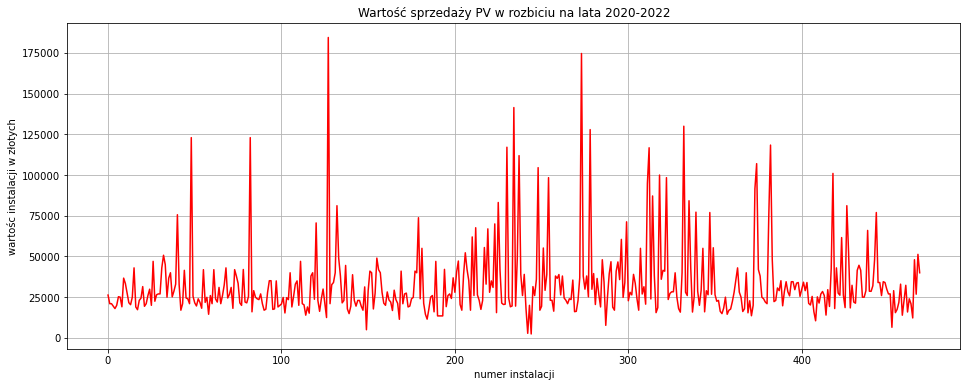

In [124]:
df.kwota_brutto.plot(figsize=(16,6), grid=True, color="red" , xlabel='numer instalacji', ylabel='wartośc instalacji w złotych', title='Wartość sprzedaży PV w rozbiciu na lata 2020-2022')
#plt.legend(loc="upper right", ncol=3)
#plt.savefig("sprzedaż_PV_2020_2022.png", dpi=300) )

# dataframe year 2020, 2021, 2022

In [125]:
df = pd.read_csv(r"D:\python\PROJECT_1\DATA_PV\zapis_testowy.csv", usecols=['moc', 'kwota_brutto', 'miesiac_podp_umowy','rok_podp_umowy'])
df['sr_cena_kW_brutto'] = (df.kwota_brutto/df.moc).round(2)
df

,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
0,5.12,26300.0,luty,2020,5136.72
1,4.32,21000.0,luty,2020,4861.11
2,4.16,21000.0,marzec,2020,5048.08
3,3.52,19500.0,marzec,2020,5539.77
4,3.84,18000.0,marzec,2020,4687.50
...,...,...,...,...,...
464,2.07,12243.0,marzec,2022,5914.49
465,9.25,48000.0,marzec,2022,5189.19
466,4.50,26830.0,marzec,2022,5962.22
467,9.88,51300.0,marzec,2022,5192.31


In [126]:
df.miesiac_podp_umowy.replace('styczeń','01', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('luty','02', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('marzec','03', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('kwiecień','04', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('maj','05', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('czerwiec','06', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('lipiec','07', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('sierpień','08', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('wrzesień','09', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('październik','10', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('listopad','11', regex= True, inplace=True)
df.miesiac_podp_umowy.replace('grudzień','12', regex= True, inplace=True)
df

,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
0,5.12,26300.0,02,2020,5136.72
1,4.32,21000.0,02,2020,4861.11
2,4.16,21000.0,03,2020,5048.08
3,3.52,19500.0,03,2020,5539.77
4,3.84,18000.0,03,2020,4687.50
...,...,...,...,...,...
464,2.07,12243.0,03,2022,5914.49
465,9.25,48000.0,03,2022,5189.19
466,4.50,26830.0,03,2022,5962.22
467,9.88,51300.0,03,2022,5192.31


In [127]:
df_2020=df[df.rok_podp_umowy==2020]
df_2021=df[df.rok_podp_umowy==2021]
df_2022=df[df.rok_podp_umowy==2022]
df_2020

,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
0,5.120,26300.0,02,2020,5136.72
1,4.320,21000.0,02,2020,4861.11
2,4.160,21000.0,03,2020,5048.08
3,3.520,19500.0,03,2020,5539.77
4,3.840,18000.0,03,2020,4687.50
...,...,...,...,...,...
227,4.125,21384.0,12,2020,5184.00
228,2.960,20500.0,12,2020,6925.68
229,4.125,20688.0,12,2020,5015.27
230,28.000,117096.0,12,2020,4182.00


In [128]:
df_2021

,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
232,4.070,19100.0,01,2021,4692.87
233,4.500,19600.0,01,2021,4355.56
234,49.875,141450.0,01,2021,2836.09
235,4.440,19500.0,01,2021,4391.89
236,11.250,49450.0,01,2021,4395.56
...,...,...,...,...,...
451,4.240,27000.0,12,2021,6367.92
452,1.920,6500.0,12,2021,3385.42
453,4.940,29000.0,12,2021,5870.45
454,2.370,15500.0,12,2021,6540.08


In [129]:
df_2022

,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
456,3.65,21800.0,01,2022,5972.60
457,5.92,33000.0,01,2022,5574.32
458,2.28,13920.0,01,2022,6105.26
459,3.80,23000.0,01,2022,6052.63
460,4.62,32300.0,01,2022,6991.34
461,2.28,15900.0,02,2022,6973.68
462,4.18,24000.0,03,2022,5741.63
463,3.60,20900.0,03,2022,5805.56
464,2.07,12243.0,03,2022,5914.49
465,9.25,48000.0,03,2022,5189.19


In [130]:
miesiace=['01','02','03','04','05','06','07','08','09','10','11','12']
kwoty_mies_2020=[]
for i in miesiace:
    k=df_2020[df_2020.miesiac_podp_umowy==i].kwota_brutto.sum().round(2)
    kwoty_mies_2020.append(k)

In [131]:
kwoty_mies_2021=[]
for i in miesiace:
    k=df_2021[df_2021.miesiac_podp_umowy==i].kwota_brutto.sum().round(2)
    kwoty_mies_2021.append(k)

In [132]:
kwoty_mies_2022=[]
for i in miesiace:
    k=df_2022[df_2022.miesiac_podp_umowy==i].kwota_brutto.sum().round(2)
    kwoty_mies_2022.append(k)

In [133]:
moc_mies_2020=[]
for i in miesiace:
    m=df_2020[df_2020.miesiac_podp_umowy==i].moc.sum().round(2)
    moc_mies_2020.append(m)

In [134]:
 moc_mies_2021=[]
for i in miesiace:
    m=df_2021[df_2021.miesiac_podp_umowy==i].moc.sum().round(2)
    moc_mies_2021.append(m)

In [135]:
moc_mies_2022=[]
for i in miesiace:
    m=df_2022[df_2022.miesiac_podp_umowy==i].moc.sum().round(2)
    moc_mies_2022.append(m)

In [136]:
new_2020 = {"miesiac_podp_umowy":miesiace, "kwota_brutto":kwoty_mies_2020, "moc":moc_mies_2020 }
df_mies_2020 = pd.DataFrame(new_2020)
df_mies_2020['sr_cena_kW_brutto'] = (df_mies_2020.kwota_brutto/df_mies_2020.moc).round(2)
df_mies_2020

,miesiac_podp_umowy,kwota_brutto,moc,sr_cena_kW_brutto
0,01,0.00,0.00,NaN
1,02,47300.00,9.44,5010.59
2,03,267100.00,55.28,4831.77
3,04,366900.00,76.00,4827.63
4,05,579713.00,120.80,4798.95
5,06,450300.00,97.19,4633.19
6,07,600002.40,129.74,4624.65
7,08,660447.76,145.43,4541.34
8,09,1158608.00,263.50,4396.99
9,10,1378425.00,314.91,4377.20


In [137]:
new_2021 = {"miesiac_podp_umowy":miesiace, "kwota_brutto":kwoty_mies_2021, "moc":moc_mies_2021 }
df_mies_2021 = pd.DataFrame(new_2021)
df_mies_2021['sr_cena_kW_brutto'] = (df_mies_2021.kwota_brutto/df_mies_2021.moc).round(2)
df_mies_2021

,miesiac_podp_umowy,kwota_brutto,moc,sr_cena_kW_brutto
0,01,482991.00,129.86,3719.32
1,02,814467.50,204.53,3982.14
2,03,432085.00,112.52,3840.07
3,04,881138.97,213.72,4122.87
4,05,308696.00,70.89,4354.58
5,06,779614.90,180.36,4322.55
6,07,697297.80,167.72,4157.51
7,08,752620.00,150.49,5001.13
8,09,1077645.10,222.36,4846.40
9,10,1191331.07,232.96,5113.89


In [138]:
new_2022 = {"miesiac_podp_umowy":miesiace, "kwota_brutto":kwoty_mies_2022, "moc":moc_mies_2022 }
df_mies_2022 = pd.DataFrame(new_2022)
df_mies_2022['sr_cena_kW_brutto'] = (df_mies_2022.kwota_brutto/df_mies_2022.moc).round(2)
df_mies_2022

,miesiac_podp_umowy,kwota_brutto,moc,sr_cena_kW_brutto
0,01,124020.0,20.27,6118.40
1,02,15900.0,2.28,6973.68
2,03,223273.0,42.34,5273.33
3,04,0.0,0.00,NaN
4,05,0.0,0.00,NaN
5,06,0.0,0.00,NaN
6,07,0.0,0.00,NaN
7,08,0.0,0.00,NaN
8,09,0.0,0.00,NaN
9,10,0.0,0.00,NaN


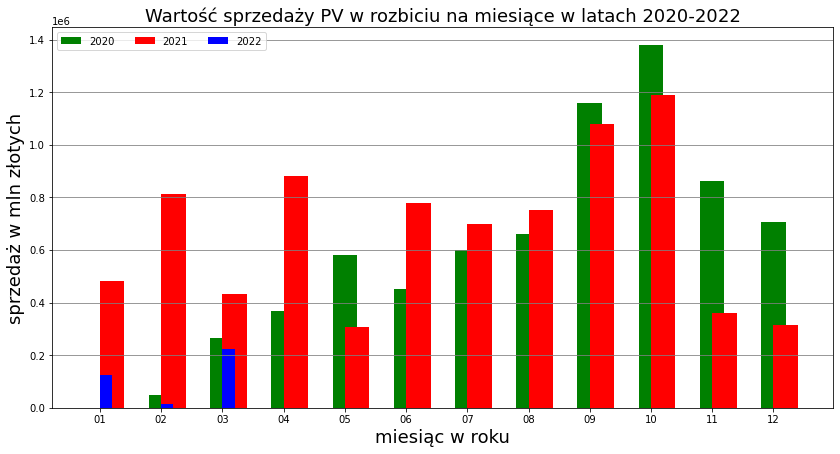

In [139]:
plt.figure(figsize=(14,7))
plt.bar(df_mies_2020.miesiac_podp_umowy, df_mies_2020.kwota_brutto, width=0.4, color="green", label="2020", align='center')
plt.bar(df_mies_2021.miesiac_podp_umowy,df_mies_2021.kwota_brutto, width=0.4, color="red", label="2021", align='edge')
plt.bar(df_mies_2022.miesiac_podp_umowy,df_mies_2022.kwota_brutto, width=0.2, color="blue", label="2022", align='edge')

#plt.text(-0.5,182000,"kwoty sprzedaży w poszczególnych miesiącach", fontsize=18, color="black")
plt.grid(axis="y", color="grey")
plt.xlabel('miesiąc w roku', fontsize=18)
plt.ylabel('sprzedaż w mln złotych',fontsize=18)
plt.title('Wartość sprzedaży PV w rozbiciu na miesiące w latach 2020-2022', fontsize=18 )
plt.legend(loc="upper left", ncol=3)
plt.savefig("sprzedaż_PV_2020_2022.png", dpi=300)
plt.show()

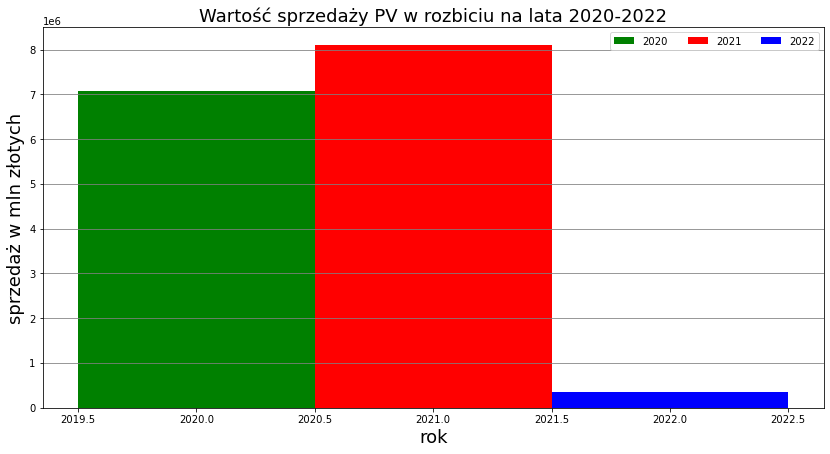

In [140]:
plt.figure(figsize=(14,7))
plt.bar(df_2020.rok_podp_umowy, df_2020.kwota_brutto.sum(), width=1, color="green", label="2020", align='center')
plt.bar(df_2021.rok_podp_umowy, df_2021.kwota_brutto.sum(), width=1, color="red", label="2021", align='center')
plt.bar(df_2022.rok_podp_umowy, df_2022.kwota_brutto.sum(), width=1, color="blue", label="2022", align='center')

#plt.text(-0.5,182000,"kwoty sprzedaży w poszczególnych miesiącach", fontsize=18, color="black")
plt.grid(axis="y", color="grey")
plt.xlabel('rok', fontsize=18)
plt.ylabel('sprzedaż w mln złotych',fontsize=18)
plt.title('Wartość sprzedaży PV w rozbiciu na lata 2020-2022', fontsize=18 )
plt.legend(loc="upper right", ncol=3)
plt.savefig("sprzedaż_PV_2020_2022.png", dpi=300)
plt.show()

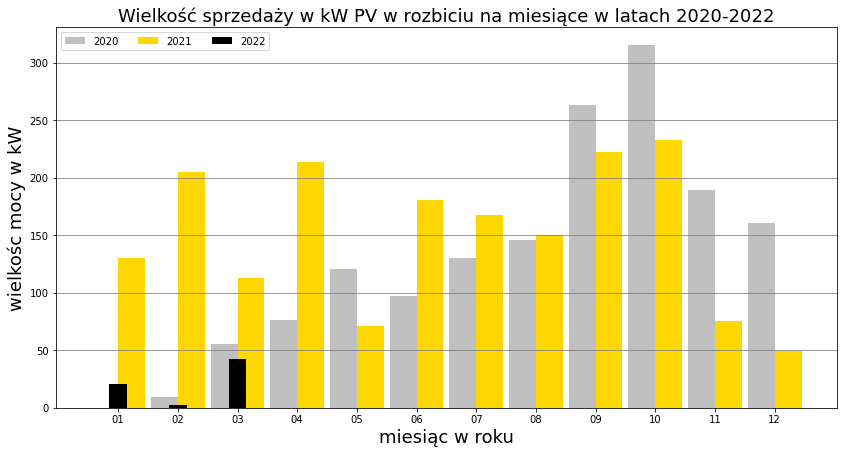

In [141]:
plt.figure(figsize=(14,7))
plt.bar(df_mies_2020.miesiac_podp_umowy, df_mies_2020.moc, width=-0.45, color="silver", label="2020", align='edge')
plt.bar(df_mies_2021.miesiac_podp_umowy,df_mies_2021.moc, width=0.45, color="gold", label="2021", align='edge')
plt.bar(df_mies_2022.miesiac_podp_umowy,df_mies_2022.moc, width=0.3, color="black", label="2022", align='center')

#plt.text(-0.5,182000,"kwoty sprzedaży w poszczególnych miesiącach", fontsize=18, color="black")
plt.grid(axis="y", color="grey")
plt.xlabel('miesiąc w roku', fontsize=18)
plt.ylabel('wielkośc mocy w kW',fontsize=18)
plt.title('Wielkość sprzedaży w kW PV w rozbiciu na miesiące w latach 2020-2022', fontsize=18 )
plt.legend(loc="upper left", ncol=3)
plt.savefig("moc_PV_2020_2022.png", dpi=300)
plt.show()

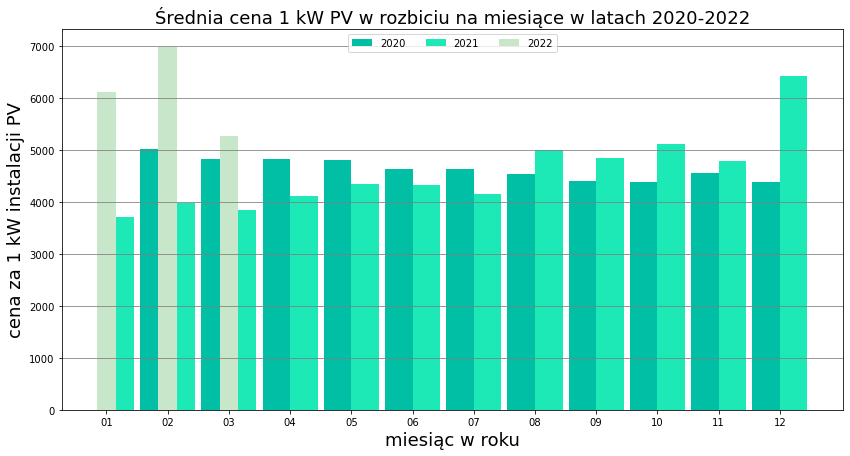

In [142]:
plt.figure(figsize=(14,7))
plt.bar(df_mies_2020.miesiac_podp_umowy, df_mies_2020.sr_cena_kW_brutto, width=-0.45, color="#00bfa5", label="2020", align='edge')
plt.bar(df_mies_2021.miesiac_podp_umowy,df_mies_2021.sr_cena_kW_brutto, width=0.45, color="#1de9b6", label="2021", align='edge')
plt.bar(df_mies_2022.miesiac_podp_umowy,df_mies_2022.sr_cena_kW_brutto, width=0.3, color="#c8e6c9", label="2022", align='center')

#plt.text(-0.5,182000,"kwoty sprzedaży w poszczególnych miesiącach", fontsize=18, color="black")
plt.grid(axis="y", color="grey")
plt.xlabel('miesiąc w roku', fontsize=18)
plt.ylabel('cena za 1 kW instalacji PV',fontsize=18)
plt.title('Średnia cena 1 kW PV w rozbiciu na miesiące w latach 2020-2022', fontsize=18 )
plt.legend(loc="upper center", ncol=3)
plt.savefig("sr_cena_PV_2020_2022.png", dpi=300)
plt.show()

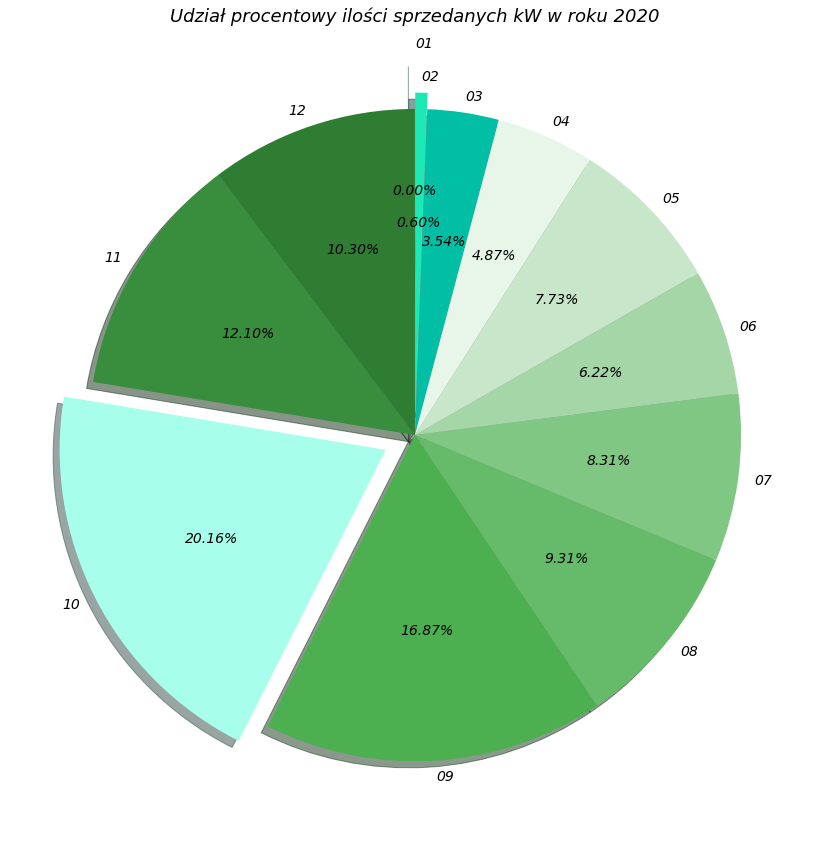

In [143]:
explode = (0.15, 0.05, 0, 0, 0, 0 ,0, 0, 0, 0.1, 0, 0)
_colors=['#64ffda','#1de9b6','#00bfa5','#e8f5e9','#c8e6c9','#a5d6a7','#81c784','#66bb6a','#4caf50','#a7ffeb',
        '#388e3c','#2e7d32','#1b5e20']
plt.figure(figsize=(15,15))
plt.title('Udział procentowy ilości sprzedanych kW w roku 2020', fontsize=18, style="italic" )
plt.pie(df_mies_2020.moc, explode=explode, colors=_colors, labels=miesiace, counterclock= False, autopct="%.2f%%", startangle=90, labeldistance= 1.05,textprops={"fontsize":14, "style":"italic"}, shadow=True, )
plt.savefig("moc_PV_2020_kołowy.png", dpi=300)
plt.show()

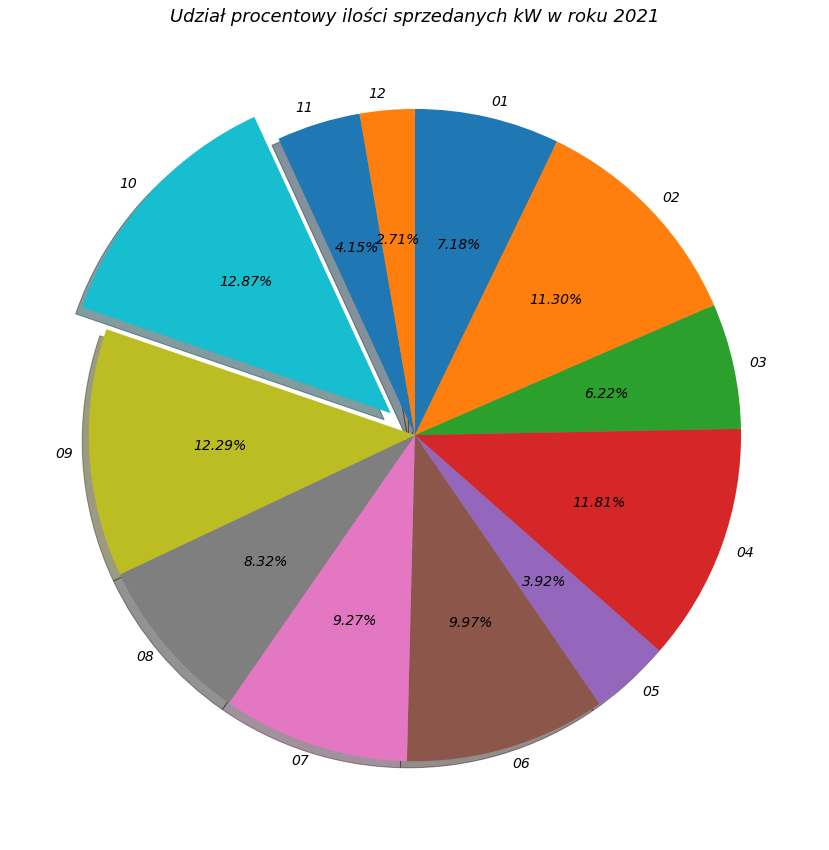

In [144]:
explode = (0, 0, 0, 0, 0, 0 ,0, 0, 0, 0.1, 0, 0)
plt.figure(figsize=(15,15))
plt.title('Udział procentowy ilości sprzedanych kW w roku 2021', fontsize=18, style="italic" )
plt.pie(df_mies_2021.moc, explode=explode, labels=miesiace, counterclock= False, autopct="%.2f%%", startangle=90, labeldistance= 1.05,textprops={"fontsize":14, "style":"italic"}, shadow=True, )
plt.savefig("moc_PV_2021_kołowy.png", dpi=300)
plt.show()

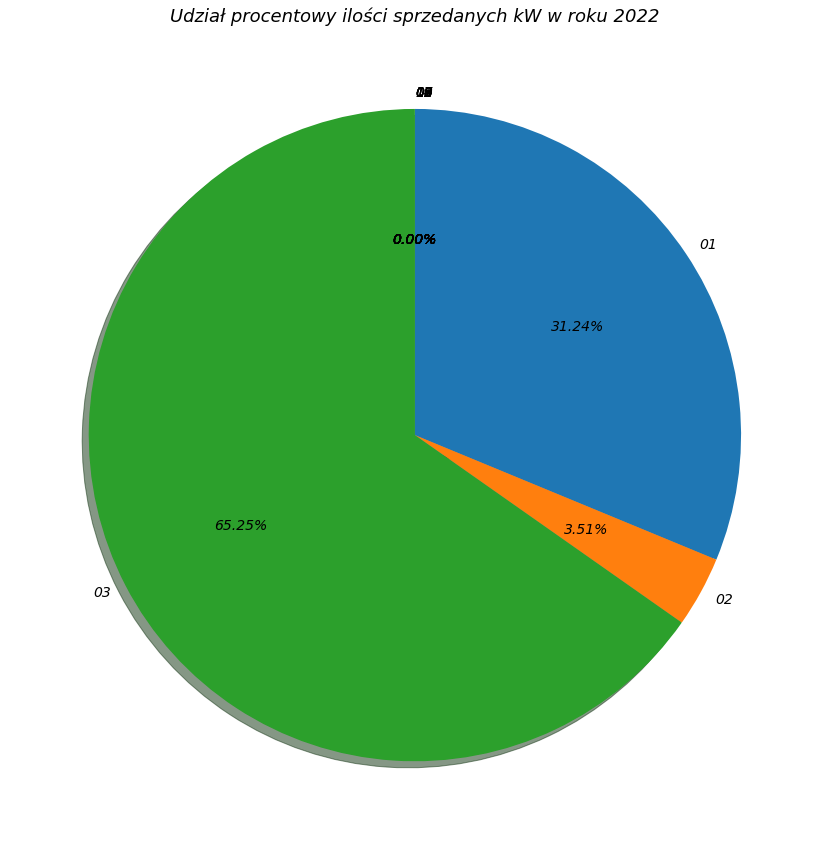

In [145]:
explode = (0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0)
plt.figure(figsize=(15,15))
plt.title('Udział procentowy ilości sprzedanych kW w roku 2022', fontsize=18, style="italic" )
plt.pie(df_mies_2022.moc, explode=explode, labels=miesiace, counterclock= False, autopct="%.2f%%", startangle=90, labeldistance= 1.05,textprops={"fontsize":14, "style":"italic"}, shadow=True, )
plt.savefig("moc_PV_2022_kołowy.png", dpi=300)
plt.show()

In [146]:
df_mies_2022

,miesiac_podp_umowy,kwota_brutto,moc,sr_cena_kW_brutto
0,01,124020.0,20.27,6118.40
1,02,15900.0,2.28,6973.68
2,03,223273.0,42.34,5273.33
3,04,0.0,0.00,NaN
4,05,0.0,0.00,NaN
5,06,0.0,0.00,NaN
6,07,0.0,0.00,NaN
7,08,0.0,0.00,NaN
8,09,0.0,0.00,NaN
9,10,0.0,0.00,NaN


In [147]:
df_2020[df_2020.miesiac_podp_umowy=='02']

,moc,kwota_brutto,miesiac_podp_umowy,rok_podp_umowy,sr_cena_kW_brutto
0,5.12,26300.0,02,2020,5136.72
1,4.32,21000.0,02,2020,4861.11


In [148]:
df_2020[df_2020.miesiac_podp_umowy=='02'].kwota_brutto.sum()

47300.0

In [149]:
df_2020[df_2020.miesiac_podp_umowy=='02'].kwota_brutto.sum()+df_2020[df_2020.miesiac_podp_umowy=='03'].kwota_brutto.sum()

314400.0

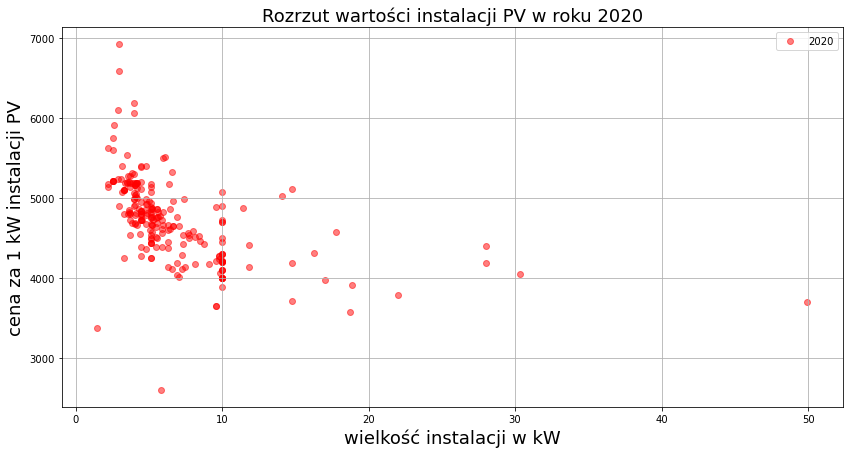

In [150]:
plt.figure(figsize=(14,7))
plt.scatter(df_2020.moc, df_2020.sr_cena_kW_brutto, color="red", marker="o", alpha=0.5, label="2020")#wykres zależnosći rocznik a cena, punkty jako kóleczka
plt.grid()
plt.xlabel('wielkość instalacji w kW', fontsize=18)
plt.ylabel('cena za 1 kW instalacji PV',fontsize=18)
plt.title('Rozrzut wartości instalacji PV w roku 2020', fontsize=18 )
plt.legend(loc="upper right", ncol=3)
plt.savefig("rozrzut_PV_2020.png", dpi=300)
plt.show()

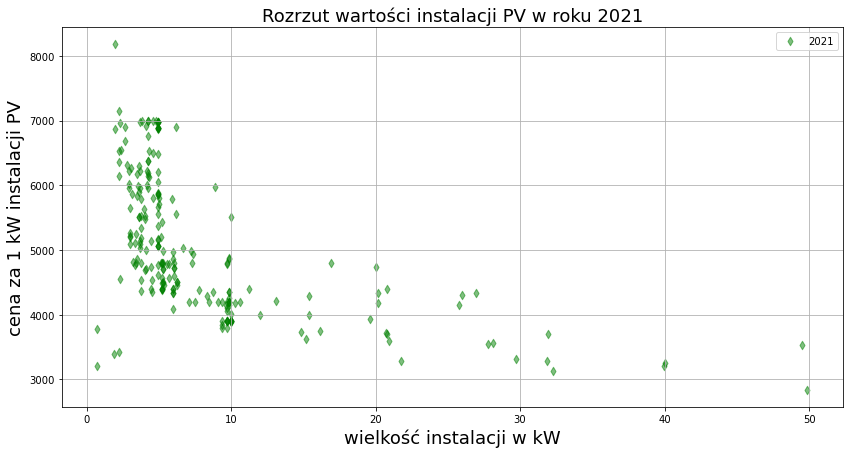

In [151]:
plt.figure(figsize=(14,7))
plt.scatter(df_2021.moc, df_2021.sr_cena_kW_brutto, color="green", marker="d", alpha=0.5, label="2021")

plt.grid()
plt.xlabel('wielkość instalacji w kW', fontsize=18)
plt.ylabel('cena za 1 kW instalacji PV',fontsize=18)
plt.title('Rozrzut wartości instalacji PV w roku 2021', fontsize=18 )
plt.legend(loc="upper right", ncol=3)
plt.savefig("rozrzut_PV_2021.png", dpi=300)
plt.show()

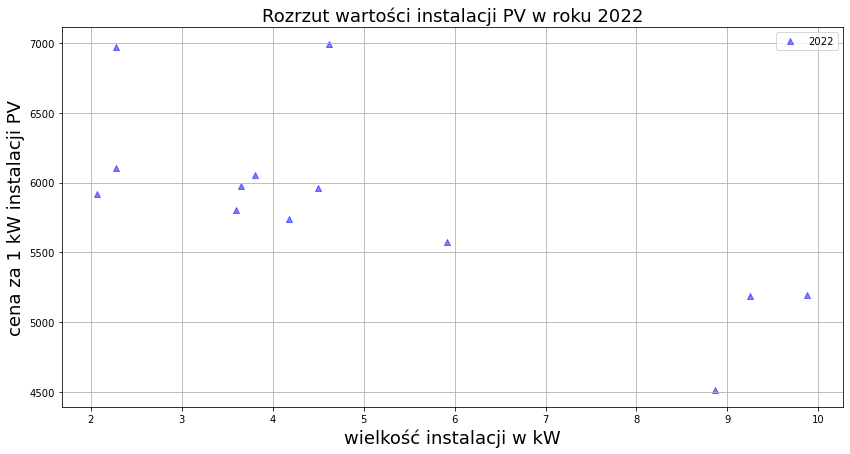

In [152]:
plt.figure(figsize=(14,7))
plt.scatter(df_2022.moc, df_2022.sr_cena_kW_brutto, color="blue", marker="^", alpha=0.5, label="2022")
plt.grid()
plt.xlabel('wielkość instalacji w kW', fontsize=18)
plt.ylabel('cena za 1 kW instalacji PV',fontsize=18)
plt.title('Rozrzut wartości instalacji PV w roku 2022', fontsize=18 )
plt.legend(loc="upper right", ncol=3)
plt.savefig("rozrzut_PV_2022.png", dpi=300)
plt.show()

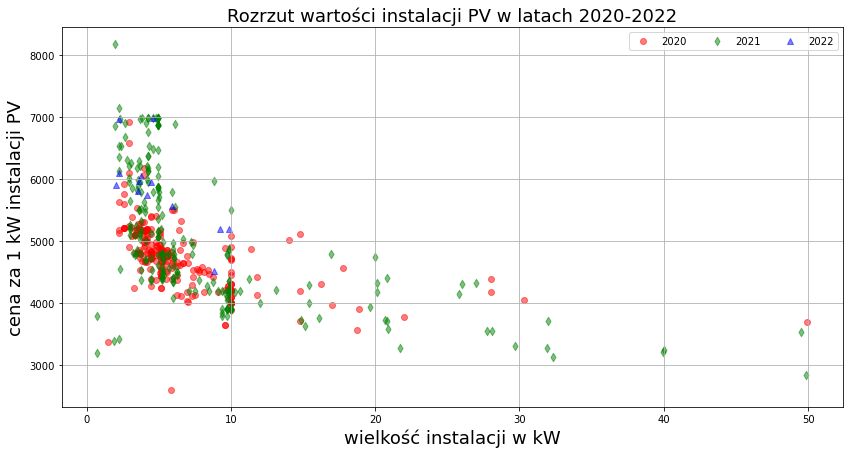

In [153]:
plt.figure(figsize=(14,7))
plt.scatter(df_2020.moc, df_2020.sr_cena_kW_brutto, color="red", marker="o", alpha=0.5, label="2020")#wykres zależnosći rocznik a cena, punkty jako kóleczka
plt.scatter(df_2021.moc, df_2021.sr_cena_kW_brutto, color="green", marker="d", alpha=0.5, label="2021")
plt.scatter(df_2022.moc, df_2022.sr_cena_kW_brutto, color="blue", marker="^", alpha=0.5, label="2022")
plt.grid()
plt.xlabel('wielkość instalacji w kW', fontsize=18)
plt.ylabel('cena za 1 kW instalacji PV',fontsize=18)
plt.title('Rozrzut wartości instalacji PV w latach 2020-2022', fontsize=18 )
plt.legend(loc="upper right", ncol=3)
plt.savefig("rozrzut_PV_2020_2022.png", dpi=300)
plt.show()

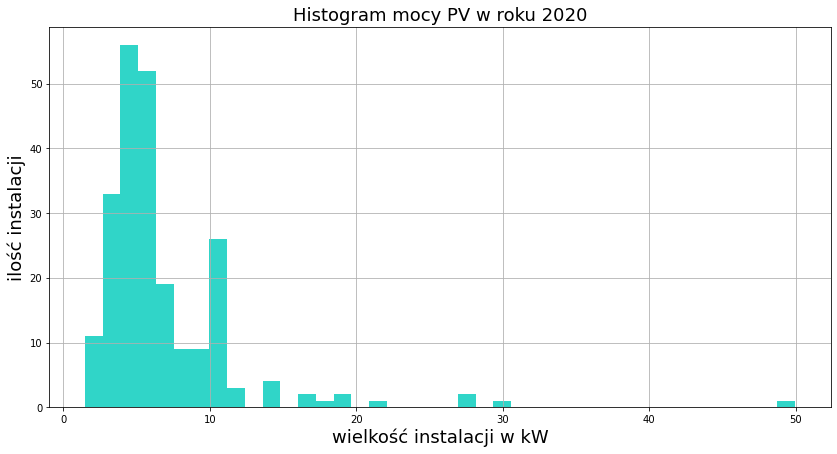

In [154]:
plt.figure(figsize=(14,7))
plt.hist(df_2020.moc, color="#30D5C8", bins=40)
plt.grid()
plt.xlabel('wielkość instalacji w kW', fontsize=18)
plt.ylabel('ilość instalacji',fontsize=18)
plt.title('Histogram mocy PV w roku 2020', fontsize=18 )
plt.savefig("histogram_mocy_PV_2020.png", dpi=300)
plt.show()

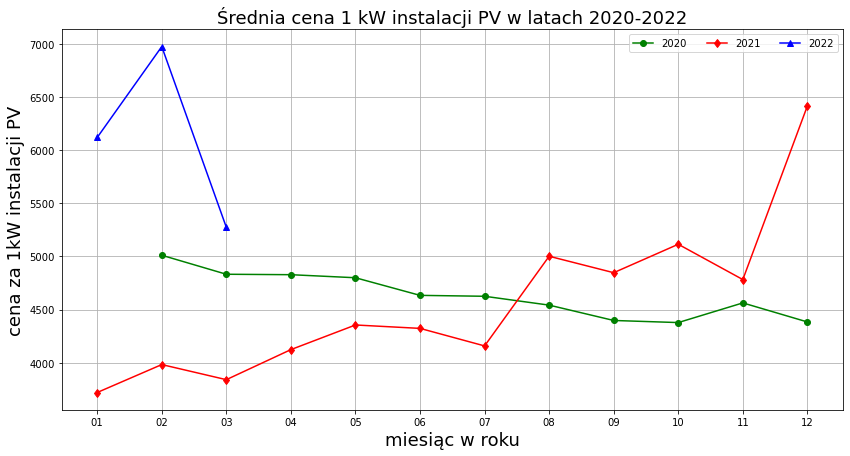

In [155]:
plt.figure(figsize=(14,7))
plt.plot(df_mies_2020.miesiac_podp_umowy,df_mies_2020.sr_cena_kW_brutto, color="green", marker="o", label="2020")#narysuje wykres sin(x)w kolorze czerowny, linia kreska kropka, punkty oznaczone kólkami o, kwadraty-s, trójkaty-^, diamenty-d
plt.plot(df_mies_2021.miesiac_podp_umowy,df_mies_2021.sr_cena_kW_brutto, color="red", marker="d", label="2021")
plt.plot(df_mies_2022.miesiac_podp_umowy,df_mies_2022.sr_cena_kW_brutto, color="blue", marker="^", label="2022")
plt.legend(loc="upper right", ncol=3)
plt.title("Średnia cena 1 kW instalacji PV w latach 2020-2022", fontsize=18)#tytuł wykresu
plt.xlabel("miesiąc w roku", fontsize=18)#nazwa osi x
plt.ylabel("cena za 1kW instalacji PV", fontsize=18)#nazwa osi y
plt.grid()

plt.savefig("sr_cena_liniowy_PV_2020_2022.png", dpi=300)
plt.show()